# Multiclass Image Classification

## Imports

In [3]:
# --- Standard Libraries ---
import os
import shutil
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Scikit-learn ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# --- TensorFlow & Keras Core ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy, AUC, F1Score
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ReduceLROnPlateau,
    ModelCheckpoint,
    CSVLogger,
    LearningRateScheduler
)
from tensorflow.keras.preprocessing import image_dataset_from_directory

# --- Keras Layers ---
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
    Activation,
    GlobalAveragePooling2D,
    Rescaling,
    RandomFlip,
    RandomRotation,
    RandomZoom,
    RandomContrast,
    RandomSharpness
)

# --- Keras Augmentation & Utils ---
from tensorflow.keras.layers import RandAugment
from tensorflow.keras.utils import to_categorical
from keras.layers import LeakyReLU  # Optional (if you're using it)
from keras.regularizers import l2

# --- Keras Applications ---
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_input_densenet
# InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input as preprocess_inception

from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.applications.convnext import preprocess_input as preprocess_convnext



In [4]:
import sys
sys.path.append("..")  # sobe um nível para encontrar o library.py


# --- Custom Modules ---
#import library
# from library import vis_images, model_summary, check_sizes, data_loading
from library import *

In [10]:
from tensorflow.keras.models import load_model
import pickle

#### Rodrigo

In [5]:
train_path_rodrigo = r"C:\Users\rodri\Desktop\rare_species 1\dataset_split\train"
valid_path_rodrigo = r"C:\Users\rodri\Desktop\rare_species 1\dataset_split\val"
test_path_rodrigo = r"C:\Users\rodri\Desktop\rare_species 1\dataset_split\test"

## Global Variables

In [6]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

## Data Loading

#### Rodrigo

In [7]:
train_rodrigo = data_loading(train_path_rodrigo)
validation_rodrigo = data_loading(valid_path_rodrigo,shuffle=False)
test_rodrigo = data_loading(test_path_rodrigo,shuffle=False)

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 1798 files belonging to 202 classes.


## Importing History (from colab notebook)

In [ ]:
with open("history_convnext_head.pkl", "rb") as f:
    history = pickle.load(f)


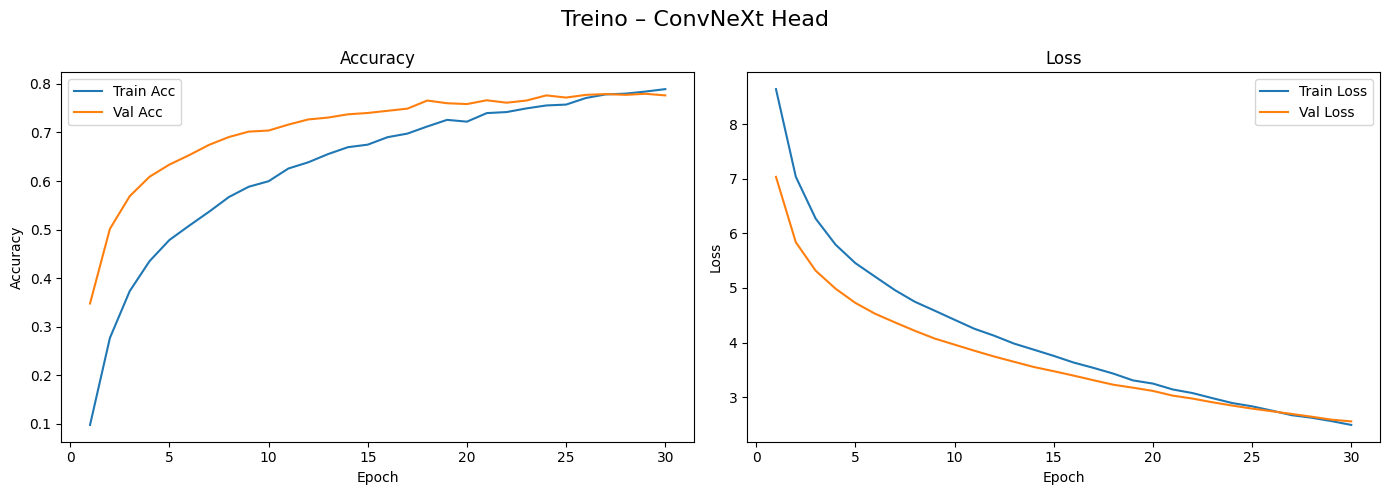

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history["loss"]) + 1)

plt.figure(figsize=(14, 5))
plt.suptitle("Treino – ConvNeXt Head", fontsize=16)

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history["accuracy"], label="Train Acc")
plt.plot(epochs, history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

#0.78 accuracy on train and val

## Loading the Model and analysing F1-Score

In [ ]:
model = load_model("convnext_head.keras") 

#### Train

In [12]:
evaluate_f1_macro(model, train_rodrigo, name="ConvNeXt Train")
evaluate_f1_weighted(model, train_rodrigo, name="ConvNeXt Train")

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

#### Validation

In [13]:
evaluate_f1_macro(model, validation_rodrigo, name="ConvNeXt Validation")
evaluate_f1_weighted(model, validation_rodrigo, name="ConvNeXt Validation")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


KeyboardInterrupt: 

#### Test

In [ ]:
evaluate_f1_macro(model, test_rodrigo, name="ConvNeXt Test")
evaluate_f1_weighted(model, test_rodrigo, name="ConvNeXt Test")